In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_3632/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Sampling Distribution

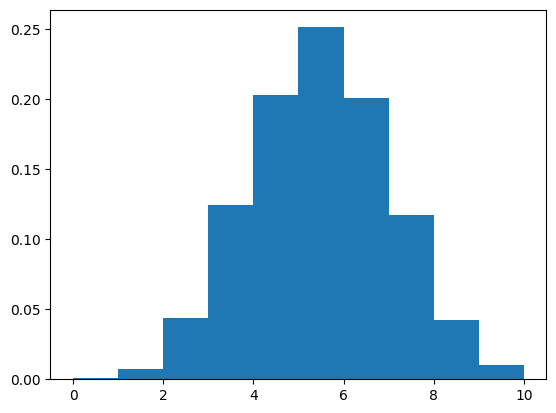

In [9]:
n = 10
prob = 0.5
size = 5000

binomial_dist = np.random.binomial(n,prob,size)
plt.hist(binomial_dist,density=True)
plt.show()

### Central Limit Theorem

In [26]:
train_df = pd.read_csv("/Users/visheshpanghal/Downloads/Data_Science/python/titanic/train.csv")
test_df = pd.read_csv("/Users/visheshpanghal/Downloads/Data_Science/python/titanic/test.csv")

df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
102,103,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
841,842,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
250,251,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
149,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
83,975,3,"Demetri, Mr. Marinko",male,NaN,0,0,349238,7.8958,NaN,S


<Axes: ylabel='Density'>

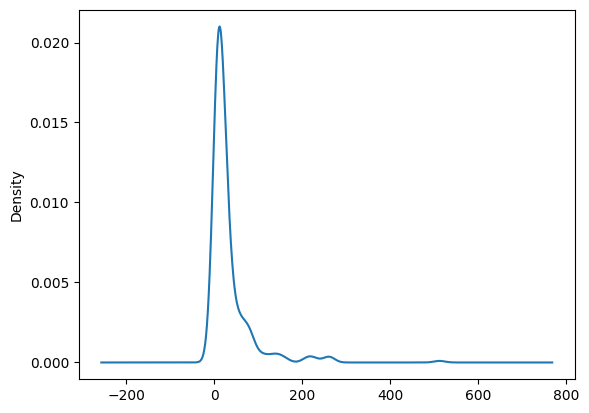

In [27]:
df['Fare'].plot(kind='kde') #Here we can reffer as population

In [70]:
df['Fare'].mean()

33.29547928134557

In [58]:
import seaborn as sns

<Axes: ylabel='Density'>

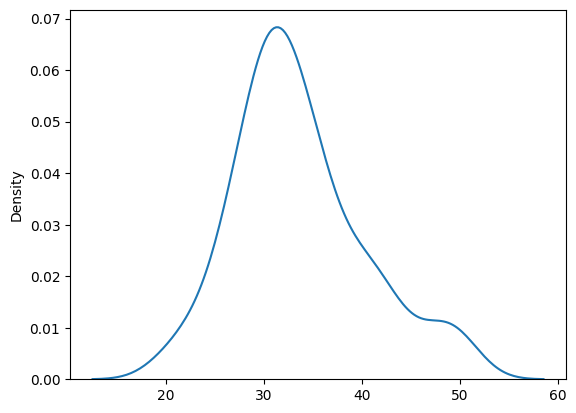

In [68]:
samples = [] # samples generated lists
for i in range(100):
    samples.append(df['Fare'].dropna().sample(70).values.tolist())
samples= np.array(samples)
samples_mean = samples.mean(axis=1)
sns.kdeplot(samples_mean)

In [69]:
samples_mean.mean()

33.642455157142855

In [73]:
samples_mean.std()/np.sqrt(70)

0.7863947595020941

In [74]:
lower_limit = samples_mean.mean() - 2*samples_mean.std()/np.sqrt(70)
upper_limit = samples_mean.mean()+2*samples_mean.std()/np.sqrt(70)

In [76]:
print("The range is",lower_limit, "-" ,upper_limit) # here we prove that our population mean lies b/w 2sigma

The range is 32.069665638138666 - 35.215244676147044


### T-procedure 

### CI = X + t(alpha/2) * S/sqrt(n)

In [78]:
samples = []
std_deviation = []
for i in range(20):
    x = df['Fare'].dropna().sample(30).values
    std_deviation.append(x.std())
    samples.append(x.tolist())

In [79]:
samples= np.array(samples)
samples_mean = samples.mean(axis=1)
samples_std = np.mean(std_deviation)